In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_insurance_data.csv')
cleaned_data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,60,1,48371.0,2,0,2,0,25.346926,2,0,1,11,330,7,927,2023-02-27 15:21:39.078837,0,0,3,2
1,38,0,31769.0,1,1,1,1,14.736611,2,0,1,9,521,7,4016,2020-09-16 15:21:39.078837,0,1,0,1
2,56,1,26209.0,0,1,0,1,33.238300,0,1,0,10,424,5,828,2021-03-29 15:21:39.078837,1,1,2,2
3,40,0,29471.0,0,4,3,2,31.565248,2,2,1,14,796,7,975,2023-05-03 15:21:39.078837,0,0,3,1
4,41,1,36427.0,0,2,3,0,13.264415,1,1,0,11,444,9,207,2022-02-14 15:21:39.078837,2,1,3,1


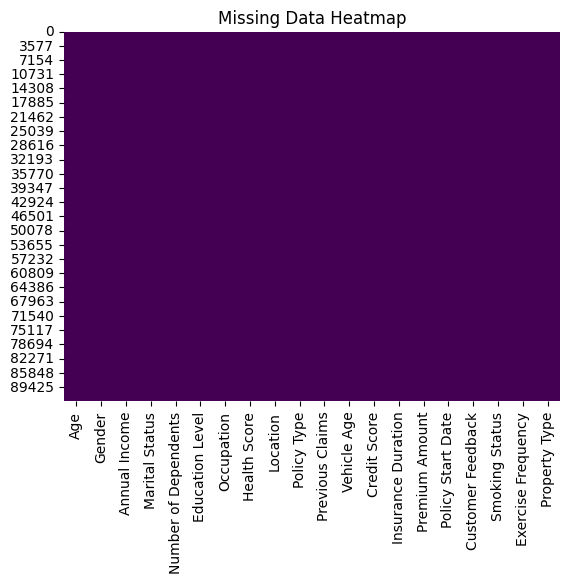

In [3]:
# EDA
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


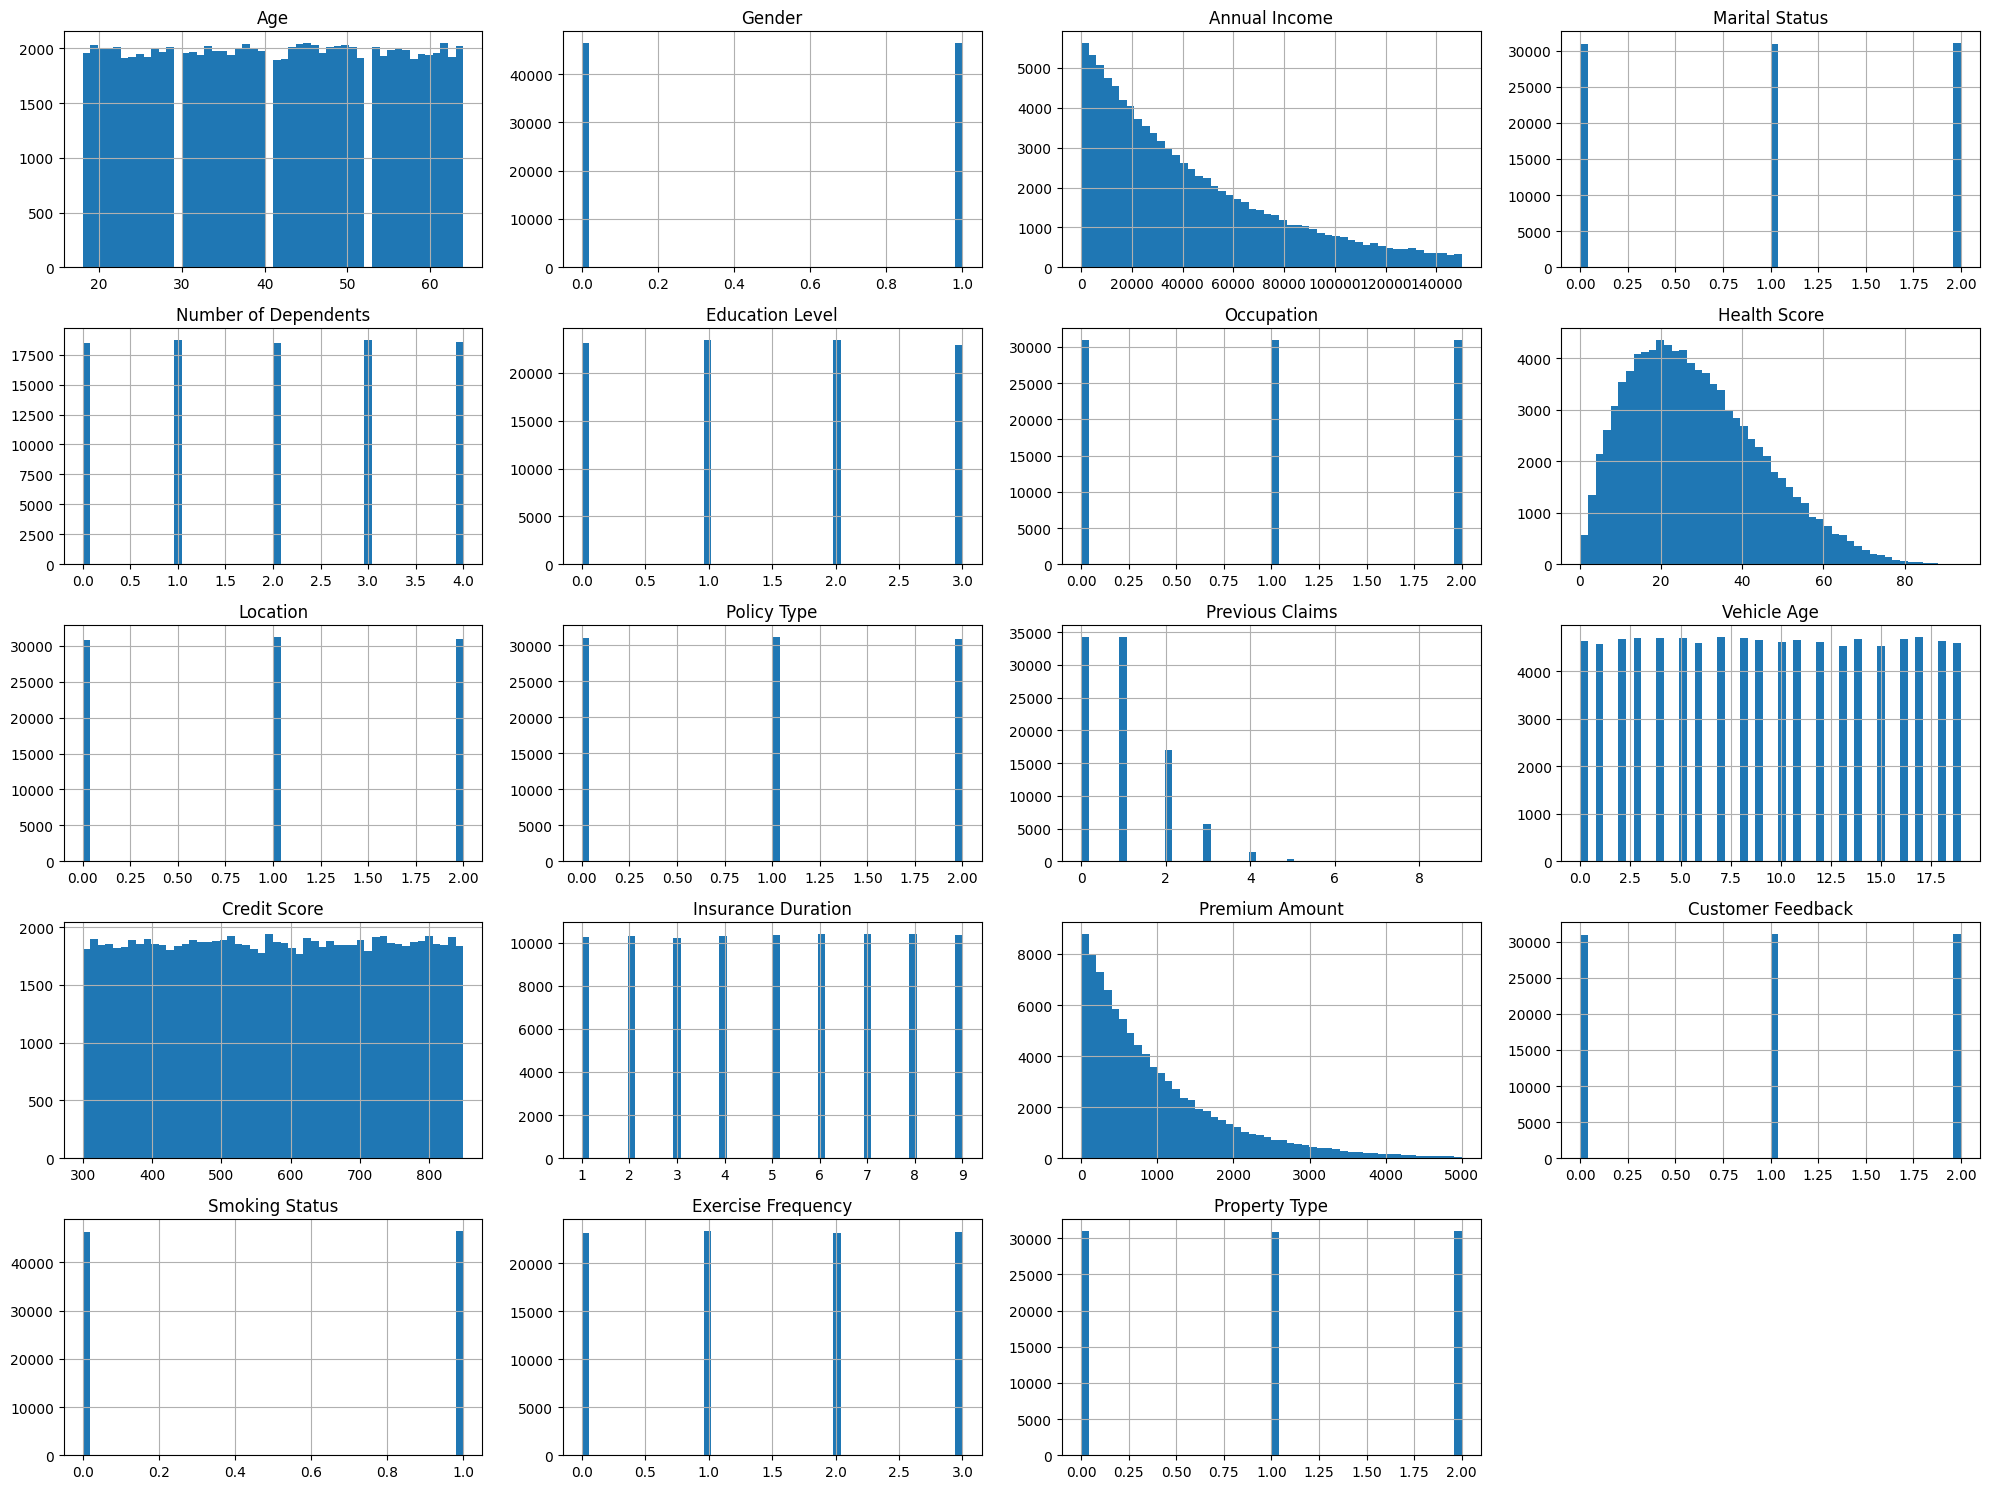

In [4]:
# Features histogram
cleaned_data.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


# EDA

## Bivariate Analysis

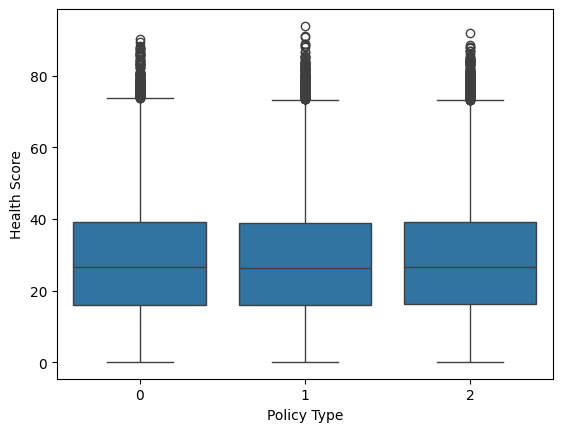

In [5]:
# Biavariate analysis
sns.boxplot(x='Policy Type', y='Health Score', data=cleaned_data)
plt.show()

## Correlation Heatmap

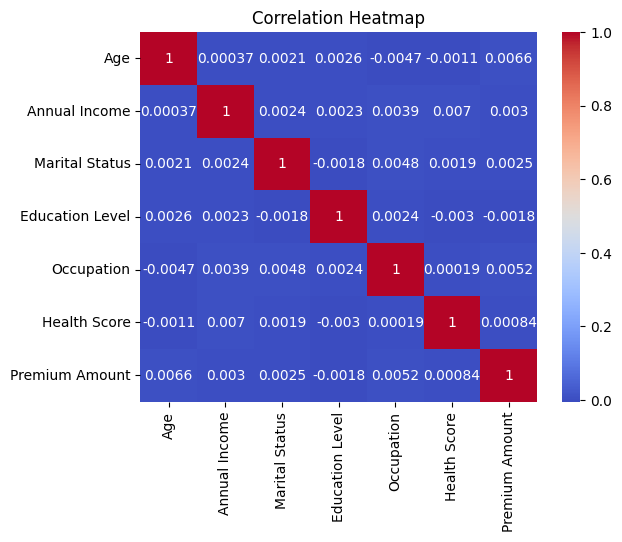

In [6]:
# Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
corr = cleaned_data[['Age', 'Annual Income', 'Marital Status', 'Education Level', 'Occupation','Health Score', 'Premium Amount']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
# corr = cleaned_data[['Age', 'Annual Income', 'Marital Status',
#                      'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 
#                      'Insurance Duration', 'Premium Amount', 'Customer Feedback', 'Smoking Status', 
#                      'Exercise Frequency', 
#                      'Property Type']].corr()

# Create the heatmap with formatted annotations
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set the title
plt.title("Correlation Heatmap")
plt.show()



# Outlier Detection

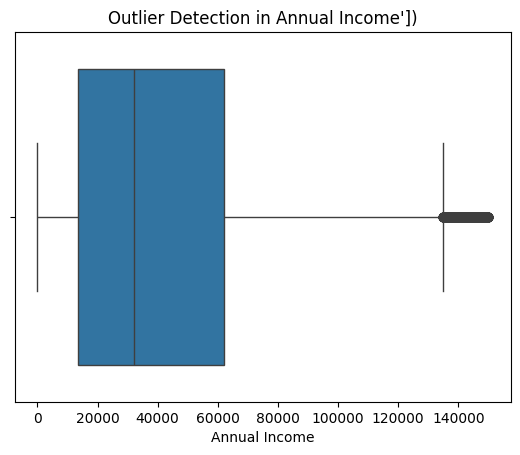

In [7]:
sns.boxplot(x=cleaned_data['Annual Income'])
plt.title("Outlier Detection in Annual Income'])")
plt.show()


# Feature Engineering - Risk

## Previous Claims

### Why it's important 
A customer who has made multiple claims in the past may be considered a higher risk, as they may have a pattern of frequent claims (which could indicate a fraud risk or a higher likelihood of needing future claims).

### Business logic
If a customer has made more than 2 claims, they could be flagged as a higher risk. You could adjust this threshold based on business knowledge, but for this example, we assume customers with more than 2 claims might be more likely to make claims again or engage in fraudulent activity.

## Credit Score
A low credit score could indicate that a customer is financially unstable, which may correlate with a higher likelihood of submitting false claims, skipping payments, or engaging in other forms of fraud.

### Business logic 
Credit scores under 400 are generally considered very low and could be a red flag for a higher risk. Again, this threshold might be adjustable depending on the region, customer base, or business context.

## Health Score
A low health score might indicate that a customer is at a higher risk of requiring healthcare or insurance claims in the future. From an insurance perspective, customers with poor health are often considered higher risk because they are more likely to submit claims.

### Business logic
A Health Score under 20 might be an indication that the customer has significant health issues, increasing the likelihood of future claims or fraud.

By defining the Risk target variable using these rules, we're making an assumption that certain negative behaviors or characteristics correlate with a higher likelihood of making future claims or engaging in fraud.

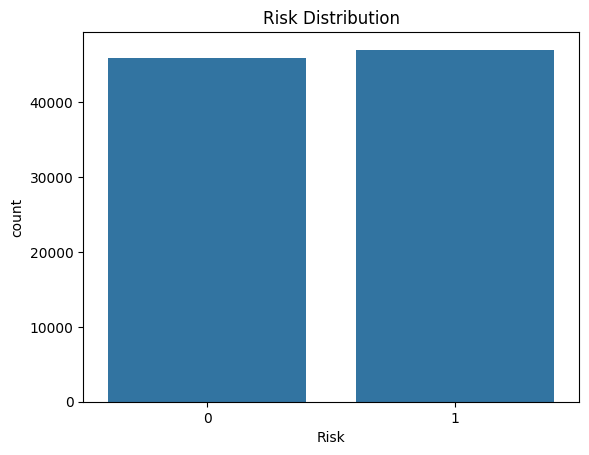

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Risk
0,60,1,48371.0,2,0,2,0,25.346926,2,0,...,11,330,7,927,2023-02-27 15:21:39.078837,0,0,3,2,1
1,38,0,31769.0,1,1,1,1,14.736611,2,0,...,9,521,7,4016,2020-09-16 15:21:39.078837,0,1,0,1,1
2,56,1,26209.0,0,1,0,1,33.238300,0,1,...,10,424,5,828,2021-03-29 15:21:39.078837,1,1,2,2,0
3,40,0,29471.0,0,4,3,2,31.565248,2,2,...,14,796,7,975,2023-05-03 15:21:39.078837,0,0,3,1,0
4,41,1,36427.0,0,2,3,0,13.264415,1,1,...,11,444,9,207,2022-02-14 15:21:39.078837,2,1,3,1,1


In [8]:
cleaned_data['Risk'] = np.where((cleaned_data['Previous Claims'] > 2) | 
                        (cleaned_data['Credit Score'] < 400) |
                        (cleaned_data['Health Score'] < 20), 1, 0)

# Validate the distribution
sns.countplot(x='Risk', data=cleaned_data)
plt.title("Risk Distribution")
plt.show()

cleaned_data.head()


## Previous claims
More claims indicate a higher likelihood of future claims.

## Credit score
Lower credit scores may indicate financial instability or fraud risk.

## Health score
Poor health increases the likelihood of needing future claims.

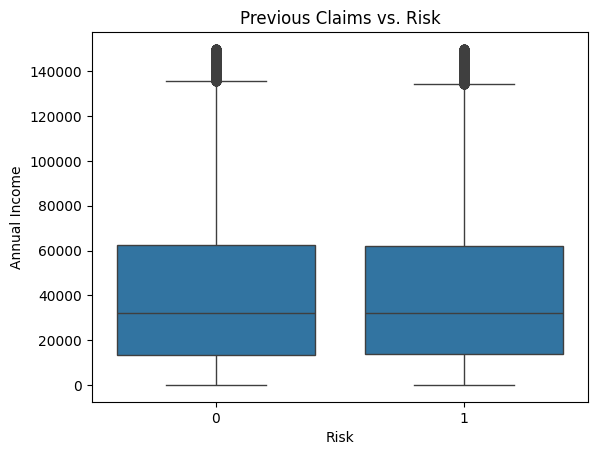

In [9]:
sns.boxplot(x='Risk', y='Annual Income', data=cleaned_data)
plt.title("Previous Claims vs. Risk")
plt.show()

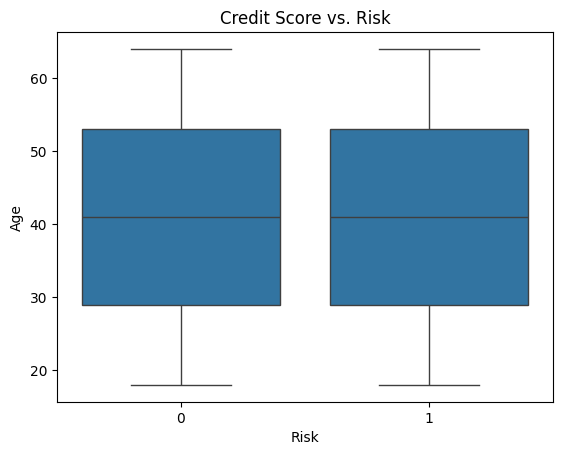

In [10]:
sns.boxplot(x='Risk', y='Age', data=cleaned_data)
plt.title("Credit Score vs. Risk")
plt.show()

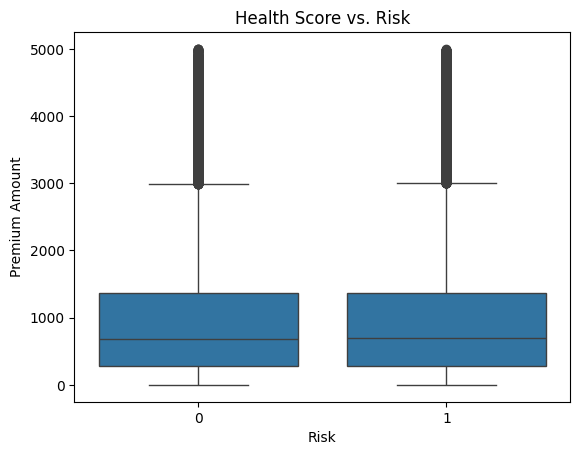

In [11]:
sns.boxplot(x='Risk', y='Premium Amount', data=cleaned_data)
plt.title("Health Score vs. Risk")
plt.show()

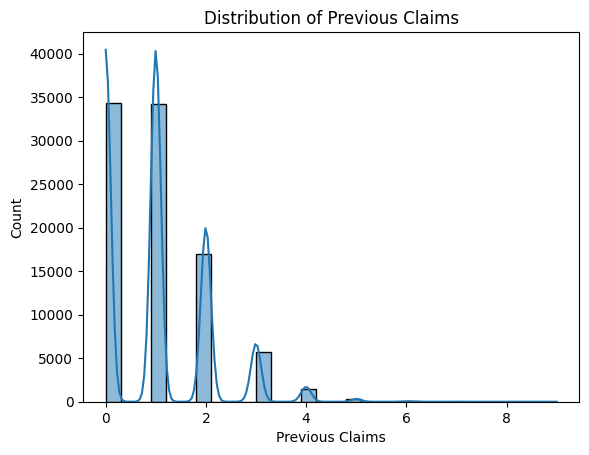

In [12]:
sns.histplot(cleaned_data['Previous Claims'], kde=True, bins=30)
plt.title("Distribution of Previous Claims")
plt.show()

# Test non linear correlations

In [13]:
from sklearn.feature_selection import mutual_info_classif
X = cleaned_data[['Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 
                  'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 
                  'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 
                  'Premium Amount', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 
                  'Property Type']]
y = cleaned_data['Risk']
mi_scores = mutual_info_classif(X, y, random_state=0)
print(mi_scores)


[0.00244822 0.00697714 0.         0.00444802 0.00225542 0.00179815
 0.0012423  0.32478022 0.00323289 0.00496041 0.0580874  0.00130405
 0.14240838 0.00186715 0.         0.00196842 0.00964826 0.00151547
 0.00495636]


# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features = pd.DataFrame(scaled_features, columns=X.columns)
scaled_features.head()



,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1.400947,1.00057,0.176772,1.221960,-1.416503,0.452692,-1.224603,-0.202181,1.226508,-1.225285,0.002278,0.262258,-1.542468,0.769894,-0.046899,-1.228028,-1.002229,1.342429,1.222923
1,-0.222409,-0.99943,-0.291098,-0.002067,-0.708476,-0.444864,0.000329,-0.864841,1.226508,-1.225285,0.002278,-0.084743,-0.339843,0.769894,3.337995,-1.228028,0.997776,-1.342458,-0.001053
2,1.105791,1.00057,-0.447788,-1.226094,-0.708476,-1.342419,0.000329,0.290670,-1.228594,0.001332,-0.997053,0.088757,-0.950600,-0.005118,-0.155382,-0.002123,0.997776,0.447467,1.222923
3,-0.074831,-0.99943,-0.355860,-1.226094,1.415605,1.350247,1.225262,0.186181,1.226508,1.227950,0.002278,0.782759,1.391686,0.769894,0.005699,-1.228028,-1.002229,1.342429,-0.001053
4,-0.001042,1.00057,-0.159829,-1.226094,-0.000449,1.350247,-1.224603,-0.956786,-0.001043,0.001332,-0.997053,0.262258,-0.824671,1.544906,-0.835867,1.223782,0.997776,1.342429,-0.001053


# Split

In [15]:
from sklearn.model_selection import train_test_split

# Select features and target
X = cleaned_data[['Age', 'Annual Income', 'Marital Status',
                     'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 
                     'Insurance Duration', 'Premium Amount', 'Customer Feedback', 'Smoking Status', 
                     'Exercise Frequency', 
                     'Property Type']]
y = cleaned_data['Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Classification

## Logistic Regression

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))
print('*'*50)


Accuracy: 0.7428663607685689
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     13815
           1       0.74      0.75      0.75     14081

    accuracy                           0.74     27896
   macro avg       0.74      0.74      0.74     27896
weighted avg       0.74      0.74      0.74     27896

**************************************************


c:\Users\Guima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

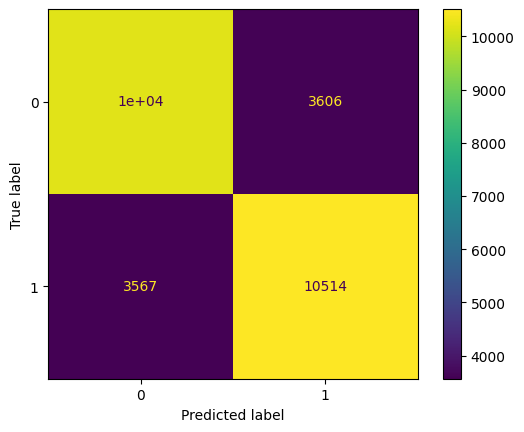

ROC AUC Score: 0.7428296467753152
Confusion Matrix : 
 [[10209  3606]
 [ 3567 10514]]


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

**Accuracy** = (TP + TN) / (TP + TN + FP + FN)
accuracy = (10514 + 10209) / (10514 + 10209 + 3606 + 3567)
accuracy = 0.7546

### True Negatives (TN)
**10209** (Low-risk customers who were correctly predicted as low-risk).

### False Positives (FP)
**3606** (Low-risk customers who were incorrectly predicted as high-risk).

### False Negatives (FN) 
**3567** (High-risk customers who were incorrectly predicted as low-risk).

### True Positives (TP)
**10514** (High-risk customers who were correctly predicted as high-risk).

# Feature Importance

In [18]:
# Feature Importance for Logistic Regression
importances = log_reg.coef_[0]
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

feature_names = ['Age', 'Annual Income', 'Marital Status',
                     'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 
                     'Insurance Duration', 'Premium Amount', 'Customer Feedback', 'Smoking Status', 
                     'Exercise Frequency', 
                     'Property Type']

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

Age: 0.023886954837523785
Annual Income: 3.647349533101203e-06
Marital Status: 0.020810296156286164
Education Level: 0.03498719024800936
Occupation: 0.02316844038790886
Health Score: -0.07629366738609947
Location: 0.023491584294238126
Policy Type: 0.02271897883961124
Insurance Duration: 0.10708480995325756
Premium Amount: 0.00012628667219856358
Customer Feedback: 0.02139414264635327
Smoking Status: 0.011110915731793675
Exercise Frequency: 0.034352495034066316
Property Type: 0.02308192816769981


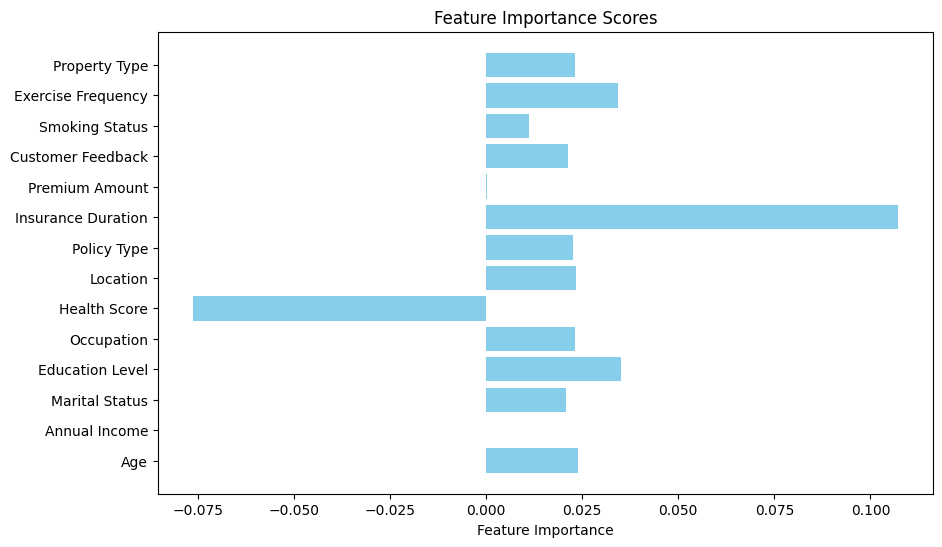

In [19]:
importance_scores = feature_importance['Importance']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

# Feature Importance Values

### Insurance Duration
**0.107**

This is the most important feature among the ones listed, meaning the duration for which a person holds an insurance policy has a significant impact on the model's prediction.

### Health Score
**-0.076**

A negative value suggests that higher health scores could lead to a lower likelihood of being flagged as high-risk, assuming a higher health score correlates with lower claims or fraud risk.

### Premium Amount
**0.000126**

Premium Amount has a very small coefficient, suggesting that it's not a major contributor to the model's prediction, but it's not completely irrelevant either.

### Education Level
**0.0349**

Education level has a moderate contribution to the model's output, indicating it plays a role in determining the risk.

### Marital Status
**0.0208**

Marital status appears to have a smaller impact compared to others like Insurance Duration and Health Score.

### Customer Feedback
**0.021**

Customer feedback is also a minor but positive contributor, suggesting it could help predict risk, especially if feedback is tied to claims behavior.

### Annual Income
**3.64e-06**

Annual Income has a very tiny effect, practically negligible in this model.

# Random Forest

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))
print('*'*50)


Accuracy: 0.8380054488098652
**************************************************
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13815
           1       1.00      0.68      0.81     14081

    accuracy                           0.84     27896
   macro avg       0.88      0.84      0.83     27896
weighted avg       0.88      0.84      0.83     27896

**************************************************


# Evaluation

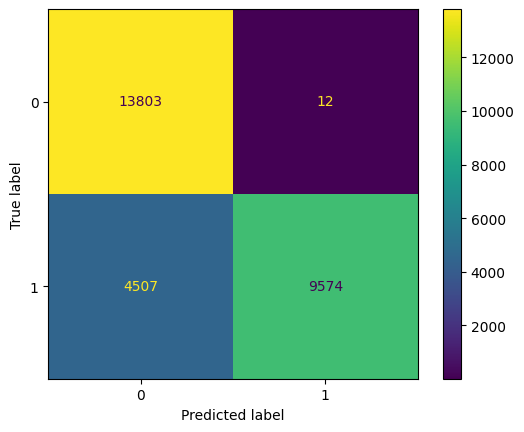

Confusion Matrix : 
 [[13803    12]
 [ 4507  9574]]


In [21]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

## True Positives (TP)
9572

High-risk customers correctly identified as high-risk.

## True Negatives (TN)
13807

Low-risk customers correctly identified as low-risk.

## False Positives (FP)
8

Low-risk customers incorrectly classified as high-risk.

## False Negatives (FN)
4509

High-risk customers incorrectly classified as low-risk.

# Other ML Algorithms

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 763}
0.8382676066809026
RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=763)
Accuracy: 0.8382563808431316
**************************************************
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13815
           1       1.00      0.68      0.81     14081

    accuracy                           0.84     27896
   macro avg       0.88      0.84      0.83     27896
weighted avg       0.88      0.84      0.83     27896

**************************************************


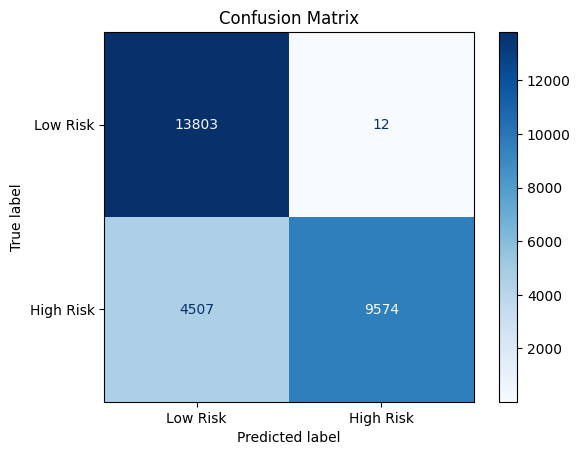

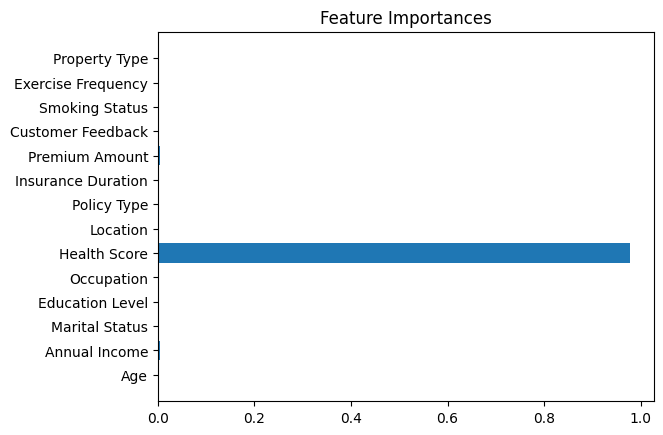

In [34]:
# Model improvement using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib


param_dist = {
    'n_estimators': randint(100, 1000),
    # 'n_estimators': randint(100, 300),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
    # 'max_features': ['auto', 'sqrt', 'log2'] -> 20 fits failed out of a total of 50. The score on these train-test partitions for these parameters will be set to nan.
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Sampling
# X_sample = X_train.sample(frac=0.3, random_state=42)
# y_sample = y_train.loc[X_sample.index]
# random_search.fit(X_sample, y_sample)

random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

y_pred = random_search.best_estimator_.predict(X_test)
joblib.dump(random_search.best_estimator_, 'best_random_forest_model.pkl')

print("Accuracy:", accuracy_score(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))
print('*'*50)

cm_display = ConfusionMatrixDisplay(cm, display_labels=["Low Risk", "High Risk"])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = random_search.best_estimator_.feature_importances_
# feature_names = X_sample.columns
feature_names = X_train.columns
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.show()



This configuration yielded an accuracy of **0.8382**, which is consistent with previous results.


# Gradient Boosting Algorithms

### XGBoost 

Accuracy: 0.8341339260108976
**************************************************
              precision    recall  f1-score   support

           0       0.75      0.99      0.86     13815
           1       0.98      0.68      0.81     14081

    accuracy                           0.83     27896
   macro avg       0.87      0.84      0.83     27896
weighted avg       0.87      0.83      0.83     27896



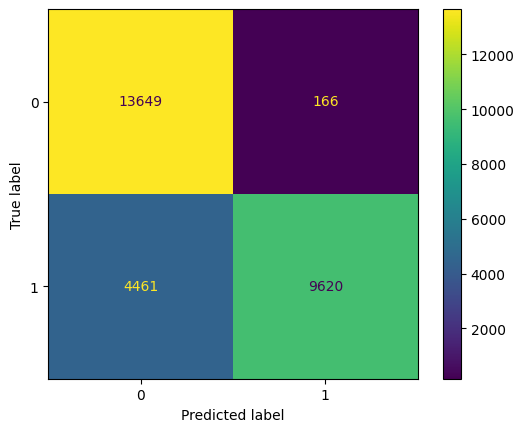

Confusion Matrix : 
 [[13649   166]
 [ 4461  9620]]


In [ ]:
# Gradient Boosting with XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 32944, number of negative: 32145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 65089, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506138 -> initscore=0.024552
[LightGBM] [Info] Start training from score 0.024552
Accuracy: 0.8363923143102954
**************************************************
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13815
           1       1.00      0.68      0.81     14081

    accuracy                           0.84     27896
   macro avg       0.87      0.84      0.83     27896
weighted avg 

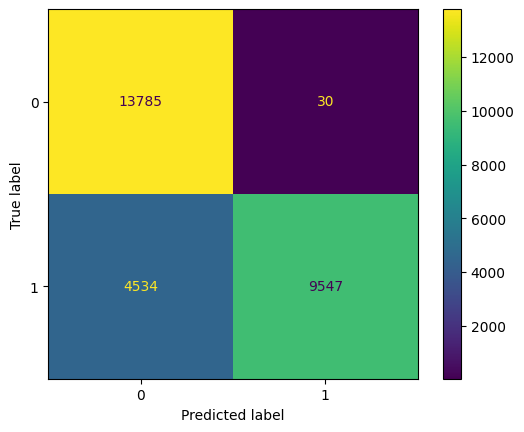

Confusion Matrix : 
 [[13785    30]
 [ 4534  9547]]


In [36]:
# Gradient Boosting with LightGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration_)

print("Accuracy:", accuracy_score(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))